In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from prettytable import PrettyTable


In [2]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('Flyber_event_logs.csv')


In [5]:
df.head()

,event_uuid,user_uuid,event_time,age,session_uuid,experiment_group,user_neighborhood,event_type
0,b9e9489e-1218-4715-b42e-604e3745db07,8191a8b8-9445-4661-9500-2bed275576f6,2019-10-06 05:34:23,40-49,2d7b8da3-573a-447f-9964-acf32526b1db,experiment_1,Manhattan,open
1,a4ff8e2c-2701-4a32-9029-bdf6efc155c5,8191a8b8-9445-4661-9500-2bed275576f6,2019-10-06 05:36:45,40-49,2d7b8da3-573a-447f-9964-acf32526b1db,experiment_1,Manhattan,#_of_users
2,41b4f6b1-cc14-4c77-a520-50c1cb9cd592,8191a8b8-9445-4661-9500-2bed275576f6,2019-10-06 05:37:31,40-49,2d7b8da3-573a-447f-9964-acf32526b1db,experiment_1,Manhattan,search
3,73b945e9-691e-4e63-aa4d-da2f74599388,8191a8b8-9445-4661-9500-2bed275576f6,2019-10-12 06:27:13,40-49,8a08005b-7e74-4664-b25d-9e29d8316d71,experiment_1,Manhattan,open
4,a070700c-8bd9-4b5a-9325-e029fda604c7,8191a8b8-9445-4661-9500-2bed275576f6,2019-10-12 06:28:10,40-49,8a08005b-7e74-4664-b25d-9e29d8316d71,experiment_1,Manhattan,#_of_users


In [6]:
df.describe()

,event_uuid,user_uuid,event_time,age,session_uuid,experiment_group,user_neighborhood,event_type
count,367083,367083,367083,367083,367083,367083,367083,367083
unique,367083,81557,274610,4,226155,4,5,4
top,b9e9489e-1218-4715-b42e-604e3745db07,aff4fb1b-414a-4f65-9b04-9e9cab138ddf,2019-10-10 14:12:42,50+,9c826a19-9f4a-4ab7-b036-b0a27ad96a39,experiment_2,Manhattan,open
freq,1,15,7,176195,4,92402,257259,226155


In [7]:
df["event_type"].unique()

array(['open', '#_of_users', 'search', 'begin_ride'], dtype=object)

In [8]:
df["experiment_group"].unique()

array(['experiment_1', 'control', 'experiment_2', 'experiment_3'],
      dtype=object)

In [9]:
df["user_neighborhood"].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [10]:
df["age"].unique()

array(['40-49', '50+', '18-29', '30-39'], dtype=object)

In [13]:
df[df['user_uuid'] == '8191a8b8-9445-4661-9500-2bed275576f6']

,event_uuid,user_uuid,event_time,age,session_uuid,experiment_group,user_neighborhood,event_type
0,b9e9489e-1218-4715-b42e-604e3745db07,8191a8b8-9445-4661-9500-2bed275576f6,2019-10-06 05:34:23,40-49,2d7b8da3-573a-447f-9964-acf32526b1db,experiment_1,Manhattan,open
1,a4ff8e2c-2701-4a32-9029-bdf6efc155c5,8191a8b8-9445-4661-9500-2bed275576f6,2019-10-06 05:36:45,40-49,2d7b8da3-573a-447f-9964-acf32526b1db,experiment_1,Manhattan,#_of_users
2,41b4f6b1-cc14-4c77-a520-50c1cb9cd592,8191a8b8-9445-4661-9500-2bed275576f6,2019-10-06 05:37:31,40-49,2d7b8da3-573a-447f-9964-acf32526b1db,experiment_1,Manhattan,search
3,73b945e9-691e-4e63-aa4d-da2f74599388,8191a8b8-9445-4661-9500-2bed275576f6,2019-10-12 06:27:13,40-49,8a08005b-7e74-4664-b25d-9e29d8316d71,experiment_1,Manhattan,open
4,a070700c-8bd9-4b5a-9325-e029fda604c7,8191a8b8-9445-4661-9500-2bed275576f6,2019-10-12 06:28:10,40-49,8a08005b-7e74-4664-b25d-9e29d8316d71,experiment_1,Manhattan,#_of_users
5,c3fd6250-31fb-46a1-88fb-d96020471c7f,8191a8b8-9445-4661-9500-2bed275576f6,2019-10-09 00:46:30,50+,6d55a221-ee9f-48ce-b3ca-51a9ad6a8371,control,Manhattan,open


In [14]:

# Filter out the relevant events
open_events = df[df['event_type'] == 'open']
begin_ride_events = df[df['event_type'] == 'begin_ride']

# Count the number of 'open' and 'begin_ride' events for each experiment group
open_counts = open_events.groupby('experiment_group').count()['event_uuid']
begin_ride_counts = begin_ride_events.groupby('experiment_group').count()['event_uuid']

# Calculate the conversion rate for each group
conversion_rates = begin_ride_counts / open_counts


experiment_group
control         0.002731
experiment_1    0.003050
experiment_2    0.003175
experiment_3    0.003017
Name: event_uuid, dtype: float64

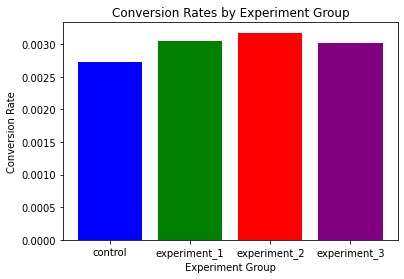

In [17]:
# Creating a bar chart to visualize the conversion rates
groups = conversion_rates.index.tolist()  # Get the group names
rates = conversion_rates.values  # Get the conversion rate values

plt.bar(groups, rates, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Experiment Group')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rates by Experiment Group')


# Display the plot
plt.show()

In [18]:
df = pd.read_csv('Flyber_event_logs.csv')

In [ ]:
# Filter for 'open' and 'begin_ride' events
open_events = df[df['event_type'] == 'open']
begin_ride_events = df[df['event_type'] == 'begin_ride']

# Group by experiment_group
grouped_open = open_events.groupby('experiment_group')['event_uuid'].count()
grouped_begin_ride = begin_ride_events.groupby('experiment_group')['event_uuid'].count()

# Calculate conversion rates
conversion_rates = grouped_begin_ride / grouped_open

# Assuming you have the following experiment groups: control, experiment_1, experiment_2, experiment_3
control_conversion_rates = conversion_rates['control']
experiment_1_conversion_rates = conversion_rates['experiment_1']
experiment_2_conversion_rates = conversion_rates['experiment_2']
experiment_3_conversion_rates = conversion_rates['experiment_3']



In [44]:
# Group by 'experiment_group' and count unique 'user_uuid'
total_users_in_group = df.groupby('experiment_group')['user_uuid'].nunique()

# Convert the result to a dictionary (optional)
total_users_in_group_dict = total_users_in_group.to_dict()


conversion_rates_dict = conversion_rates.to_dict()

# Create a table with PrettyTable
table = PrettyTable()
table.field_names = ["Experiment Group", "Total Users"]

# Add rows to the table
for group, total_users in total_users_in_group_dict.items():
    table.add_row([group, total_users])

# Print the table
print(table)


+------------------+-------------+
| Experiment Group | Total Users |
+------------------+-------------+
|     control      |    32125    |
|   experiment_1   |    32005    |
|   experiment_2   |    32216    |
|   experiment_3   |    32105    |
+------------------+-------------+


In [43]:
# Define event types
open_event = 'open'
begin_ride_event = 'begin_ride'

# Group by 'experiment_group' and count occurrences of each event type
grouped = df.groupby(['experiment_group', 'event_type']).count()['event_uuid'].unstack()

# Calculate conversion counts (number of 'begin_ride' events)
conversion_counts = grouped[begin_ride_event]

# Calculate total 'open' events to determine the total number of trials per group
total_open_counts = grouped[open_event]

# Function to create a list of 1s and 0s representing conversions and non-conversions
def create_conversion_array(conversions, total):
    conversion_array = [1] * conversions + [0] * (total - conversions)
    np.random.shuffle(conversion_array)  # Shuffle to randomize
    return conversion_array

# Create conversion arrays for each experiment group
control_data = create_conversion_array(conversion_counts['control'], total_open_counts['control'])
experiment_1_data = create_conversion_array(conversion_counts['experiment_1'], total_open_counts['experiment_1'])
experiment_2_data = create_conversion_array(conversion_counts['experiment_2'], total_open_counts['experiment_2'])
experiment_3_data = create_conversion_array(conversion_counts['experiment_3'], total_open_counts['experiment_3'])

# Function to count the number of conversions (1s) in the array
def count_conversions(data_array):
    return sum(data_array)

# Count conversions for each experiment group
control_conversions = count_conversions(control_data)
experiment_1_conversions = count_conversions(experiment_1_data)
experiment_2_conversions = count_conversions(experiment_2_data)
experiment_3_conversions = count_conversions(experiment_3_data)

# Create a table with PrettyTable
table = PrettyTable()
table.field_names = ["Experiment Group", "Number of Conversions"]
table.add_row(["Control", control_conversions])
table.add_row(["Experiment 1", experiment_1_conversions])
table.add_row(["Experiment 2", experiment_2_conversions])
table.add_row(["Experiment 3", experiment_3_conversions])

# Print the table
print(table)


+------------------+-----------------------+
| Experiment Group | Number of Conversions |
+------------------+-----------------------+
|     Control      |          154          |
|   Experiment 1   |          172          |
|   Experiment 2   |          180          |
|   Experiment 3   |          171          |
+------------------+-----------------------+


In [42]:
# Perform t-tests
# Control vs Experiment 1
t_statistic_1, p_value_1 = stats.ttest_ind(control_data, experiment_1_data, equal_var=False)

# Control vs Experiment 2
t_statistic_2, p_value_2 = stats.ttest_ind(control_data, experiment_2_data, equal_var=False)

# Control vs Experiment 3
t_statistic_3, p_value_3 = stats.ttest_ind(control_data, experiment_3_data, equal_var=False)

# Create a table with PrettyTable
table = PrettyTable()
table.field_names = ["Comparison", "T-Statistic", "P-Value"]
table.add_row(["Control vs Experiment 1", f"{t_statistic_1:.4f}", f"{p_value_1:.4f}"])
table.add_row(["Control vs Experiment 2", f"{t_statistic_2:.4f}", f"{p_value_2:.4f}"])
table.add_row(["Control vs Experiment 3", f"{t_statistic_3:.4f}", f"{p_value_3:.4f}"])

# Print the table
print(table)

+-------------------------+-------------+---------+
|        Comparison       | T-Statistic | P-Value |
+-------------------------+-------------+---------+
| Control vs Experiment 1 |   -0.9984   |  0.3181 |
| Control vs Experiment 2 |   -1.3768   |  0.1686 |
| Control vs Experiment 3 |   -0.8970   |  0.3697 |
+-------------------------+-------------+---------+


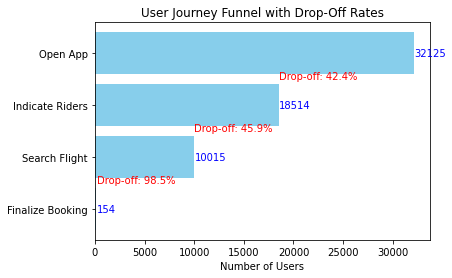

In [51]:
# Simulated data for each step in the funnel
steps = ['Open App', 'Indicate Riders', 'Search Flight', 'Finalize Booking']
users = [32125, 18514, 10015, 154]  # Example counts for each step

# Calculate drop-off rates
drop_off_rates = [(users[i] - users[i + 1]) / users[i] * 100 for i in range(len(users) - 1)]

# Create a funnel plot
fig, ax = plt.subplots()

# Plotting the bars for each step
ax.barh(steps, users, color='skyblue')

# Annotating each bar with the count of users
for i, v in enumerate(users):
    ax.text(v + 10, i, str(v), color='blue', va='center')

# Annotating drop-off rates
for i, rate in enumerate(drop_off_rates):
    ax.text(users[i + 1] + 10, i + 0.5, f'Drop-off: {rate:.1f}%', color='red')

# Setting labels and title
ax.set_xlabel('Number of Users')
ax.set_title('User Journey Funnel with Drop-Off Rates')

# Inverting y-axis to have the first step at the top
ax.invert_yaxis()

plt.show()

In [50]:
# Filter for control group
control_group = df[df['experiment_group'] == 'experiment_3']

# Count the total number of users for each event type in the control group
total_users_control_group = control_group.groupby('event_type')['user_uuid'].nunique()

# Print the result
print(total_users_control_group)

event_type
#_of_users    18397
begin_ride      171
open          32105
search        10009
Name: user_uuid, dtype: int64


In [56]:
df = pd.read_csv('Flyber_event_logs.csv')

In [58]:
# Group by 'age' and count unique 'user_uuid'
users_by_age = df.groupby('age')['user_uuid'].nunique()

# Create a table for age demographics
table_age = PrettyTable()
table_age.field_names = ["Age Group", "Number of Users"]

# Add rows to the table
for age_group, user_count in users_by_age.items():
    table_age.add_row([age_group, user_count])

# Print the table
print("User Distribution by Age Group:")
print(table_age)

User Distribution by Age Group:
+-----------+-----------------+
| Age Group | Number of Users |
+-----------+-----------------+
|   18-29   |      28321      |
|   30-39   |      20124      |
|   40-49   |      41774      |
|    50+    |      64059      |
+-----------+-----------------+


In [60]:
# Group by 'user_neighborhood' and count unique 'user_uuid'
users_by_neighborhood = df.groupby('user_neighborhood')['user_uuid'].nunique()

# Create a table for neighborhood demographics
table_neighborhood = PrettyTable()
table_neighborhood.field_names = ["Neighborhood", "Number of Users"]

# Add rows to the table
for neighborhood, user_count in users_by_neighborhood.items():
    table_neighborhood.add_row([neighborhood, user_count])

# Print the table
print("\nUser Distribution by Neighborhood:")
print(table_neighborhood)


User Distribution by Neighborhood:
+---------------+-----------------+
|  Neighborhood | Number of Users |
+---------------+-----------------+
|     Bronx     |       2396      |
|    Brooklyn   |      16435      |
|   Manhattan   |      57110      |
|     Queens    |       4050      |
| Staten Island |       1566      |
+---------------+-----------------+


Funnel Analysis by Age Group:
Age Group: 40-49
  Step: open, Count: 41774, Drop-off Rate: 0.00%
  Step: #_of_users, Count: 20718, Drop-off Rate: 50.40%
  Step: search, Count: 13945, Drop-off Rate: 32.69%
  Step: begin_ride, Count: 256, Drop-off Rate: 98.16%

Age Group: 50+
  Step: open, Count: 64059, Drop-off Rate: 0.00%
  Step: #_of_users, Count: 37057, Drop-off Rate: 42.15%
  Step: search, Count: 14035, Drop-off Rate: 62.13%
  Step: begin_ride, Count: 195, Drop-off Rate: 98.61%

Age Group: 18-29
  Step: open, Count: 28321, Drop-off Rate: 0.00%
  Step: #_of_users, Count: 13145, Drop-off Rate: 53.59%
  Step: search, Count: 8692, Drop-off Rate: 33.88%
  Step: begin_ride, Count: 126, Drop-off Rate: 98.55%

Age Group: 30-39
  Step: open, Count: 20124, Drop-off Rate: 0.00%
  Step: #_of_users, Count: 9001, Drop-off Rate: 55.27%
  Step: search, Count: 5834, Drop-off Rate: 35.18%
  Step: begin_ride, Count: 100, Drop-off Rate: 98.29%



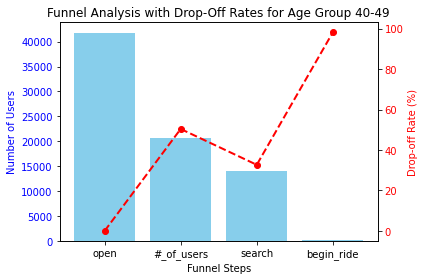

In [69]:
# Define the funnel steps
funnel_steps = ['open', '#_of_users', 'search', 'begin_ride']

# Function to calculate funnel for a given segment
def calculate_funnel(df, segment_column):
    funnel_results = {}
    for segment in df[segment_column].unique():
        segment_df = df[df[segment_column] == segment]
        segment_funnel = {}
        previous_count = None
        for step in funnel_steps:
            count = segment_df[segment_df['event_type'] == step]['user_uuid'].nunique()
            drop_off_rate = 0 if previous_count is None else (previous_count - count) / previous_count * 100
            segment_funnel[step] = {'count': count, 'drop_off_rate': drop_off_rate}
            previous_count = count
        funnel_results[segment] = segment_funnel
    return funnel_results

# Calculate funnel for each age group
age_funnel = calculate_funnel(df, 'age')

# Calculate funnel for each neighborhood
neighborhood_funnel = calculate_funnel(df, 'user_neighborhood')

# Print the results
print("Funnel Analysis by Age Group:")
for age_group, funnel in age_funnel.items():
    print(f"Age Group: {age_group}")
    for step, data in funnel.items():
        print(f"  Step: {step}, Count: {data['count']}, Drop-off Rate: {data['drop_off_rate']:.2f}%")
    print()

""" print("Funnel Analysis by Neighborhood:")
for neighborhood, funnel in neighborhood_funnel.items():
    print(f"Neighborhood: {neighborhood}")
    for step, data in funnel.items():
        print(f"  Step: {step}, Count: {data['count']}, Drop-off Rate: {data['drop_off_rate']:.2f}%")
    print() """

funnel_data = age_funnel['40-49']

# Extracting count and drop-off rate for plotting
steps = funnel_steps  # The steps defined in your funnel
counts = [funnel_data[step]['count'] for step in steps]
drop_off_rates = [funnel_data[step]['drop_off_rate'] for step in steps]

# Creating the funnel plot
fig, ax1 = plt.subplots()

# Plotting the bar chart for user count
ax1.bar(steps, counts, color='skyblue')
ax1.set_xlabel('Funnel Steps')
ax1.set_ylabel('Number of Users', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a secondary axis to plot drop-off rate
ax2 = ax1.twinx()
ax2.plot(steps, drop_off_rates, color='red', marker='o', linestyle='dashed', linewidth=2, markersize=6)
ax2.set_ylabel('Drop-off Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding titles and layout adjustments
plt.title('Funnel Analysis with Drop-Off Rates for Age Group 40-49')
fig.tight_layout()

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


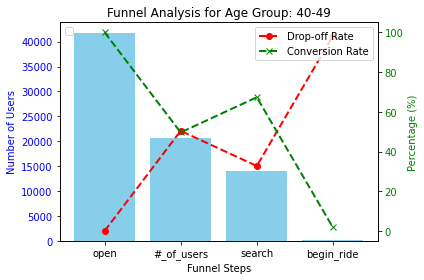

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


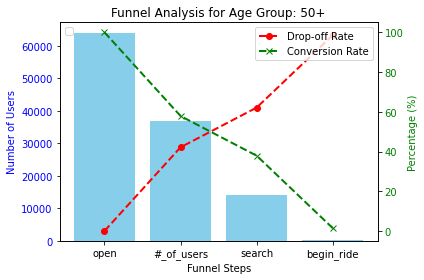

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


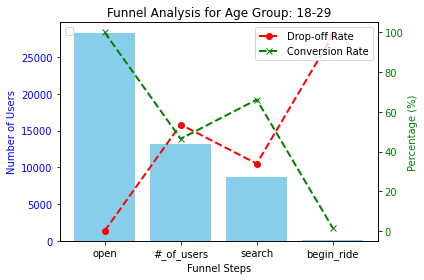

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


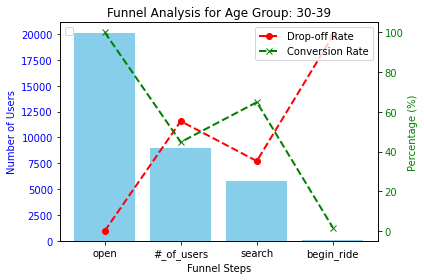

In [67]:
# Sample funnel data for different age groups
funnel_data_age_groups = {
    '40-49': {
        'open': {'count': 41774, 'drop_off_rate': 0.00},
        '#_of_users': {'count': 20718, 'drop_off_rate': 50.40},
        'search': {'count': 13945, 'drop_off_rate': 32.69},
        'begin_ride': {'count': 256, 'drop_off_rate': 98.16}
    },
    '50+': {
        'open': {'count': 64059, 'drop_off_rate': 0.00},
        '#_of_users': {'count': 37057, 'drop_off_rate': 42.15},
        'search': {'count': 14035, 'drop_off_rate': 62.13},
        'begin_ride': {'count': 195, 'drop_off_rate': 98.61}
    },
    '18-29': {
        'open': {'count': 28321, 'drop_off_rate': 0.00},
        '#_of_users': {'count': 13145, 'drop_off_rate': 53.59},
        'search': {'count': 8692, 'drop_off_rate': 33.88},
        'begin_ride': {'count': 126, 'drop_off_rate': 98.55}
    },
    '30-39': {
        'open': {'count': 20124, 'drop_off_rate': 0.00},
        '#_of_users': {'count': 9001, 'drop_off_rate': 55.27},
        'search': {'count': 5834, 'drop_off_rate': 35.18},
        'begin_ride': {'count': 100, 'drop_off_rate': 98.29}
    }
}

# Define the funnel steps
funnel_steps = ['open', '#_of_users', 'search', 'begin_ride']

# Plotting separate graphs for each age group
for age_group, funnel in funnel_data_age_groups.items():
    counts = [funnel[step]['count'] for step in funnel_steps]
    drop_off_rates = [funnel[step]['drop_off_rate'] for step in funnel_steps]
    conversion_rates = [100 - rate for rate in drop_off_rates]

    fig, ax1 = plt.subplots()

    # Plotting the bar chart for user count
    ax1.bar(funnel_steps, counts, color='skyblue')
    ax1.set_xlabel('Funnel Steps')
    ax1.set_ylabel('Number of Users', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Creating a secondary axis to plot drop-off rate and conversion rate
    ax2 = ax1.twinx()
    ax2.plot(funnel_steps, drop_off_rates, color='red', marker='o', linestyle='dashed', linewidth=2, markersize=6, label='Drop-off Rate')
    ax2.plot(funnel_steps, conversion_rates, color='green', marker='x', linestyle='dashed', linewidth=2, markersize=6, label='Conversion Rate')
    ax2.set_ylabel('Percentage (%)', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # Adding titles and layout adjustments
    plt.title(f'Funnel Analysis for Age Group: {age_group}')
    fig.tight_layout()

    # Adding legend
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Show the plot
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


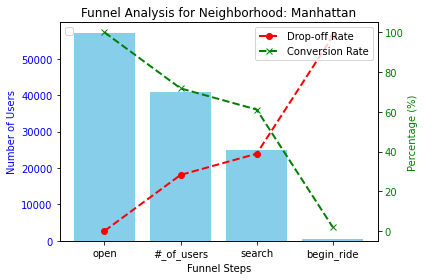

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


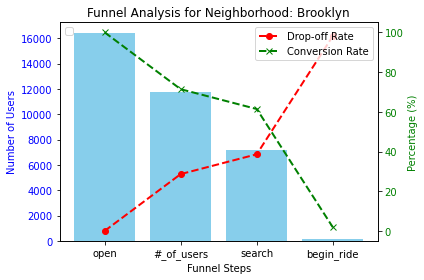

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


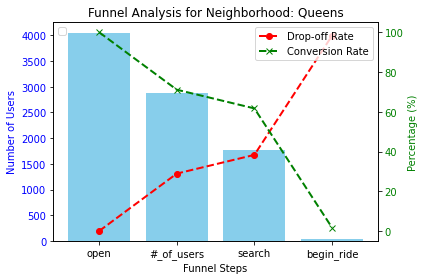

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


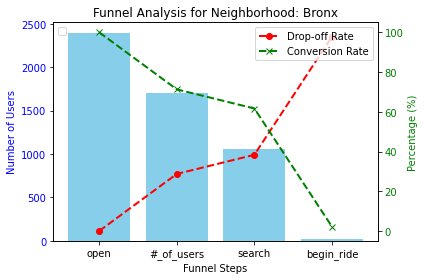

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


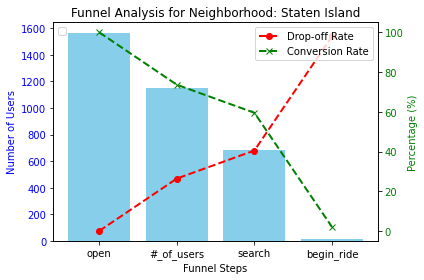

In [68]:
# Sample funnel data for different neighborhoods
funnel_data_neighborhoods = {
    'Manhattan': {
        'open': {'count': 57110, 'drop_off_rate': 0.00},
        '#_of_users': {'count': 40991, 'drop_off_rate': 28.22},
        'search': {'count': 25051, 'drop_off_rate': 38.89},
        'begin_ride': {'count': 474, 'drop_off_rate': 98.11}
    },
    'Brooklyn': {
        'open': {'count': 16435, 'drop_off_rate': 0.00},
        '#_of_users': {'count': 11729, 'drop_off_rate': 28.63},
        'search': {'count': 7200, 'drop_off_rate': 38.61},
        'begin_ride': {'count': 134, 'drop_off_rate': 98.14}
    },
    'Queens': {
        'open': {'count': 4050, 'drop_off_rate': 0.00},
        '#_of_users': {'count': 2880, 'drop_off_rate': 28.89},
        'search': {'count': 1777, 'drop_off_rate': 38.30},
        'begin_ride': {'count': 31, 'drop_off_rate': 98.26}
    },
    'Bronx': {
        'open': {'count': 2396, 'drop_off_rate': 0.00},
        '#_of_users': {'count': 1708, 'drop_off_rate': 28.71},
        'search': {'count': 1053, 'drop_off_rate': 38.35},
        'begin_ride': {'count': 23, 'drop_off_rate': 97.82}
    },
    'Staten Island': {
        'open': {'count': 1566, 'drop_off_rate': 0.00},
        '#_of_users': {'count': 1153, 'drop_off_rate': 26.37},
        'search': {'count': 686, 'drop_off_rate': 40.50},
        'begin_ride': {'count': 14, 'drop_off_rate': 97.96}
    }
}

# Define the funnel steps
funnel_steps = ['open', '#_of_users', 'search', 'begin_ride']

# Plotting separate graphs for each neighborhood
for neighborhood, funnel in funnel_data_neighborhoods.items():
    counts = [funnel[step]['count'] for step in funnel_steps]
    drop_off_rates = [funnel[step]['drop_off_rate'] for step in funnel_steps]
    conversion_rates = [100 - rate for rate in drop_off_rates]

    fig, ax1 = plt.subplots()

    # Plotting the bar chart for user count
    ax1.bar(funnel_steps, counts, color='skyblue')
    ax1.set_xlabel('Funnel Steps')
    ax1.set_ylabel('Number of Users', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Creating a secondary axis to plot drop-off rate and conversion rate
    ax2 = ax1.twinx()
    ax2.plot(funnel_steps, drop_off_rates, color='red', marker='o', linestyle='dashed', linewidth=2, markersize=6, label='Drop-off Rate')
    ax2.plot(funnel_steps, conversion_rates, color='green', marker='x', linestyle='dashed', linewidth=2, markersize=6, label='Conversion Rate')
    ax2.set_ylabel('Percentage (%)', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # Adding titles and layout adjustments
    plt.title(f'Funnel Analysis for Neighborhood: {neighborhood}')
    fig.tight_layout()

    # Adding legend
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Show the plot
    plt.show()